## Generate Dataset

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim

In [14]:
num_data=2400
t=np.linspace(start=0,stop=100,num=num_data)
y=np.sin(t)+np.sin(2*t)
e=np.random.normal(0,0.1,num_data)
#y=y+e

(10, 2390)
(10, 2390, 1)


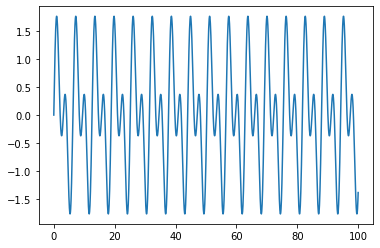

In [49]:
seq_len=10
X=[]
y_true=[]

for i in range(len(t)-seq_len):
    X.append(y[i:i+seq_len])
    y_true.append(y[i+seq_len])
    
X=np.array(X)
y_true=np.array(y_true)

X=np.swapaxes(X,0,1)
print(X.shape)
X=np.expand_dims(X,axis=2)
print(X.shape)

plt.plot(t,y)

## Model Define

In [53]:
import torch
import torch.nn as nn


class RNN(nn.Module):
    def __init__(self, input_dim, output_dim, hid_dim, batch_size): 
        super(RNN, self).__init__()
        
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.hid_dim = hid_dim
        self.batch_size = batch_size
        
        self.u = nn.Linear(self.input_dim, self.hid_dim, bias=False)
        self.w = nn.Linear(self.hid_dim, self.hid_dim, bias=False)
        self.v = nn.Linear(self.hid_dim, self.output_dim, bias=False)
        self.act = nn.Tanh()
        
        self.hidden = self.init_hidden()
        
    def init_hidden(self, batch_size=None):
        if batch_size is None:
            batch_size = self.batch_size
        return torch.zeros(batch_size, self.hid_dim)
    
    def forward(self, x):
        h = self.act(self.u(x) + self.w(self.hidden))
        y = self.v(h)
        return y, h
        

## Train Trifonometric Function

In [54]:
model = RNN(1, 1, 50, 2390)
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)
epoch = 100

for i in range(epoch):
    model.train()
    model.zero_grad()
    optimizer.zero_grad()
    
    model.hidden = model.init_hidden()
    
    for x in X:
        x = torch.Tensor(x).float()
        y_true = torch.Tensor(y_true).float()

        y_pred, hidden = model(x)
        model.hidden = hidden

    loss = loss_fn(y_pred.view(-1), y_true.view(-1))
    loss.backward()
    optimizer.step()
    print(loss.item())

0.9042680859565735
0.7273516058921814
0.5862016081809998
0.47358056902885437
0.38375765085220337
0.3121676445007324
0.25515925884246826
0.20980557799339294
0.17375807464122772
0.145132377743721
0.12241750955581665
0.10440331697463989
0.09012195467948914
0.07880064845085144
0.06982345879077911
0.06270026415586472
0.057041753083467484
0.05253911763429642
0.04894787445664406
0.04607465863227844
0.04376677796244621
0.041903767734766006
0.0403907410800457
0.039152950048446655
0.038131628185510635
0.03728058561682701
0.036563530564308167
0.035951968282461166
0.03542354330420494
0.034960728138685226
0.03454975783824921
0.034179843962192535
0.033842552453279495
0.03353123739361763
0.03324071317911148
0.03296690434217453
0.0327066071331501
0.03245732933282852
0.03221709281206131
0.0319843627512455
0.03175791725516319
0.031536802649497986
0.03132025897502899
0.031107693910598755
0.030898645520210266
0.030692728236317635
0.03048965521156788
0.03028917871415615
0.030091118067502975
0.0298953130841

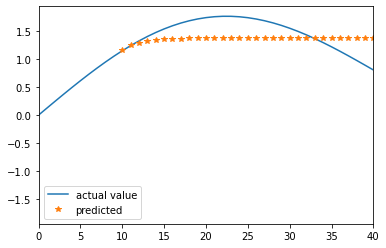

In [55]:
test_X = np.expand_dims(X[:, 0, :], 1)

list_y_pred = []

model.eval()
with torch.no_grad():
    model.hidden = model.init_hidden(batch_size=1)

    for x in test_X:
        x = torch.Tensor(x).float()
        y_pred, hidden = model(x)
        model.hidden = hidden
    list_y_pred.append(y_pred.view(-1).item())
    
    temp_X = list()
    temp_X += list(np.squeeze(test_X))[1:]
    temp_X.append(y_pred.view(-1).item())
    for i in range(2389):
        model.hidden = model.init_hidden(batch_size=1)
        
        temp2_X = torch.unsqueeze(torch.unsqueeze(torch.Tensor(temp_X), 1), 1)
        
        for x in temp2_X:
            y_pred, hidden = model(x)
            model.hidden = hidden
        list_y_pred.append(y_pred.view(-1).item())
        
        temp_X.append(y_pred.view(-1).item())
        temp_X.pop(0)

plt.plot(y, label='actual value')
plt.plot(list(range(10, 2400)), list_y_pred, '*', label='predicted')
plt.xlim(0, 40)
plt.legend()

In [114]:
def get_n_parameter(model):
    x=0
    for i in list(model.parameters()):
        y=1
        for j in list(i.size()):
            y=y*j
        x+=y
    return x

In [115]:
get_n_parameter(model)

2600

In [109]:
a=list(model.parameters())
len(a)

3

In [111]:
for i in list(model.parameters()):
    print(i.size())

torch.Size([50, 1])
torch.Size([50, 50])
torch.Size([1, 50])
